# Daily Coding Problem: Problem #743 [Medium]
---
Good morning! Here's your coding interview problem for today.

This problem was asked by Mozilla.

A bridge in a connected (undirected) graph is an edge that, if removed, causes the graph to become disconnected. Find all the bridges in a graph.

[Example Data - https://www.geeksforgeeks.org/bridge-in-a-graph/](https://www.geeksforgeeks.org/bridge-in-a-graph/)

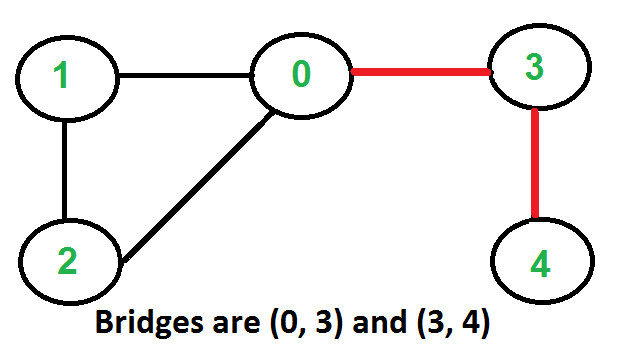

In [153]:
from collections import defaultdict

class Graph:
    def __init__(self, verteces, edges):
        self.verteces = verteces
        self.edges = edges
        self.assoc = defaultdict(lambda: set())

        for u in self.verteces:
            for v in self.verteces:
                if (u, v) in self.edges or (v, u) in self.edges:
                    self.assoc[u].add(v)
                    self.assoc[v].add(u)

    def get_children(self, vertex):
        return self.assoc[vertex]


graph1 = Graph(
    verteces=[0, 1, 2, 3, 4],
    edges=[(1, 0), (1, 2), (2, 0), (0, 3), (3, 4)],
)

graph2 = Graph(
    verteces=[0, 1, 2, 3],
    edges=[(0, 1), (1, 2), (2, 3)],
)

graph3 = Graph(
    verteces=[0, 1, 2, 3, 4, 5, 6],
    edges=[(0, 1), (0, 2), (0, 1), (2, 1), (0, 1),
           (1, 3), (1, 4), (1, 6), (0, 1), (3, 5), (4, 5)],
)

graph1.assoc

defaultdict(<function __main__.Graph.__init__.<locals>.<lambda>()>,
            {0: {1, 2, 3}, 1: {0, 2}, 2: {0, 1}, 3: {0, 4}, 4: {3}})

In [161]:
def find_bridges(graph):
    visited = set()
    cycles = []
    stack = []
    
    def dfs(vertex):
        stack.append(vertex)

        if vertex in visited:
            # cycle detected
            # there should be a faster way to do this
            cycle = stack[stack.index(vertex):]
            if len(cycle) > 3: # 0, 1, 0 is not "interesting" cycle
                cycles.append(cycle)
        else:
            children = graph.get_children(vertex)
            visited.add(vertex)
            for child in children:
                dfs(child)

        stack.pop()

    start_vertex = graph.verteces[0]
    dfs(start_vertex)
    bridges = set(graph.edges[::])
#     print(cycles)
    
    for cycle in cycles:
        for u, v in zip(cycle, cycle[1:]):
            if (u, v) in bridges:
                bridges.remove((u, v))
            if (v, u) in bridges:
                bridges.remove((v, u))
            
    return bridges

In [162]:
actual_bridges = find_bridges(graph1)

assert actual_bridges == {(0, 3), (3, 4)}, f'Not equal {actual_bridges}'

In [163]:
actual_bridges = find_bridges(graph2)

assert actual_bridges == {(0, 1), (1, 2), (2, 3)}, f'Not equal {actual_bridges}'

In [164]:
actual_bridges = find_bridges(graph3)

assert actual_bridges == {(1, 6)}, f'Not equal {actual_bridges}'

---